In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style="whitegrid")


In [7]:
print(f"Current working directory: {os.getcwd()}")

Current working directory: C:\Users\Student\anaconda_projects\fcd8dd15-9fcd-4b31-a162-169aaacd34a9


## 1. Load the Superstore dataset

In [14]:
# Assistant
import pandas as pd

# Try a different encoding that can handle the special characters in your file
# Common alternatives to try are 'latin1', 'ISO-8859-1', 'cp1252', etc.
#df = pd.read_csv("C:/Temp/superstore_sales.csv", encoding="latin1")
# Alternative encodings to try if latin1 doesn't work:
#df = pd.read_csv("C:/Temp/superstore_sales.csv", encoding="ISO-8859-1")
df = pd.read_csv("C:/Temp/superstore_sales.csv", encoding="cp1252")

# Preview
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## 2. Basic Cleaning

In [15]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Ensure numerics
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


## 3. Replicate SQL Analysis in Python

#### Monthly Sales Trend

In [16]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()
print(monthly_sales)


Order Date
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160


#### Top 10 Profitable Products

In [17]:
top_products = df.groupby("Product Name")['Profit'].sum().nlargest(10)
print(top_products)


Product Name
Product 6827    8399.9760
Product 8154    6719.9808
Product 4191    5039.9856
Product 9040    4946.3700
Product 4099    4630.4755
Product 2624    3919.9888
Product 510     3177.4750
Product 8489    2799.9840
Product 7667    2591.9568
Product 6521    2504.2216
Name: Profit, dtype: float64


#### Sales by Region

In [18]:
sales_region = df.groupby("Region")['Sales'].sum().sort_values(ascending=False)
print(sales_region)


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


## 4. Visualization Example

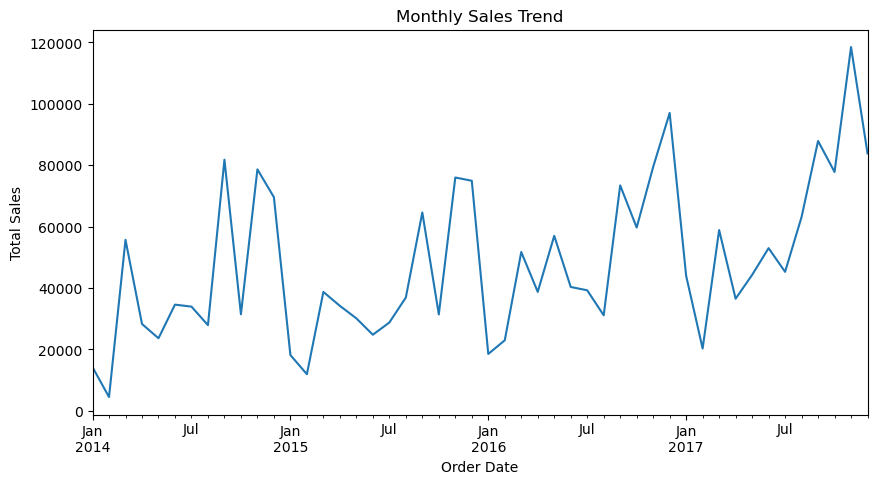

In [19]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind="line", figsize=(10,5), title="Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()


## 4. Data Cleaning 2

In [20]:
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Convert numeric columns
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows where Order Date is missing
df = df.dropna(subset=['Order Date'])


## 5. Exploratory Data Analysis

#### (a) Monthly Sales Trend

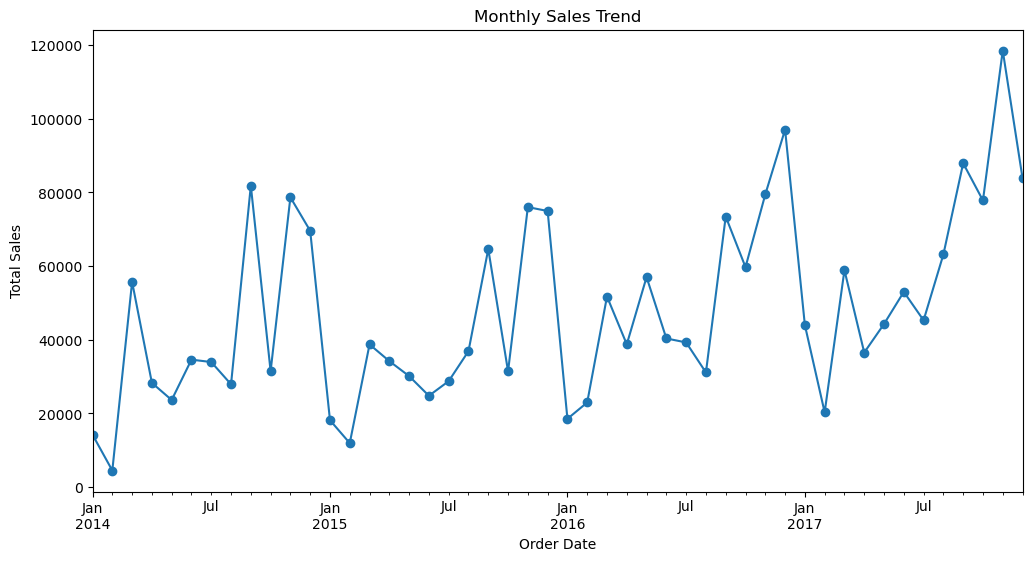

In [21]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()

monthly_sales.plot(kind="line", figsize=(12,6), marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()


#### (b) Top 10 Most Profitable Products

C:\Users\Student\AppData\Local\Temp\ipykernel_7060\3672818910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


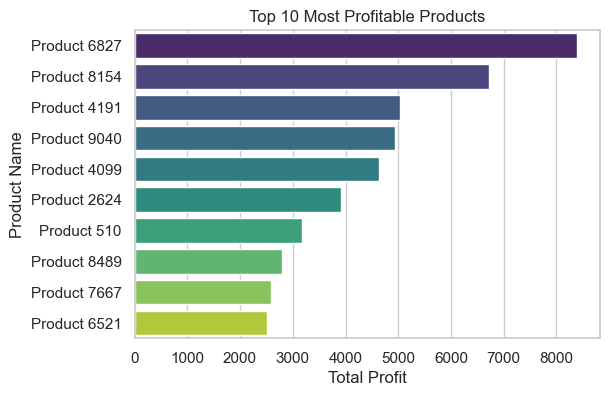

In [31]:
top_products = df.groupby("Product Name")['Profit'].sum().nlargest(10)

plt.figure(figsize=(6,4))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit")
plt.show()


#### (c) Sales by Region

C:\Users\Student\AppData\Local\Temp\ipykernel_7060\1804754162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_region.index, y=sales_region.values, palette="coolwarm")


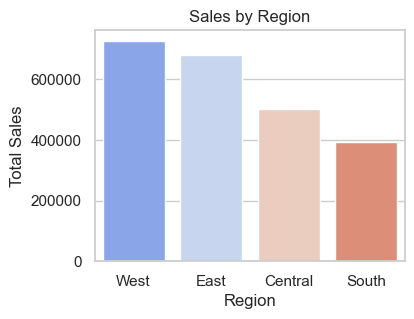

In [30]:
sales_region = df.groupby("Region")['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(4,3))
sns.barplot(x=sales_region.index, y=sales_region.values, palette="coolwarm")
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()


#### (d) Sales by Customer Segment

C:\Users\Student\AppData\Local\Temp\ipykernel_7060\1766687190.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="Set2")


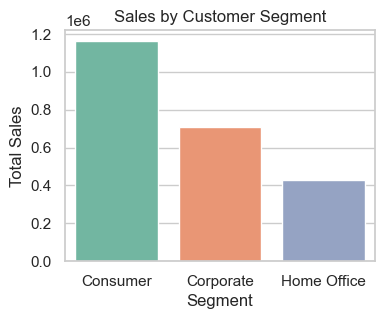

In [35]:
segment_sales = df.groupby("Segment")['Sales'].sum()

plt.figure(figsize=(4,3))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette="Set2")
plt.title("Sales by Customer Segment")
plt.ylabel("Total Sales")
plt.show()


#### (e) Profit vs Discount

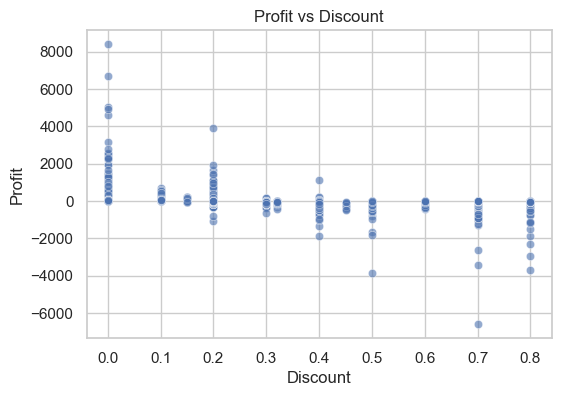

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.6)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


#### (f) Top 10 Customers by Sales

C:\Users\Student\AppData\Local\Temp\ipykernel_7060\4243001763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")


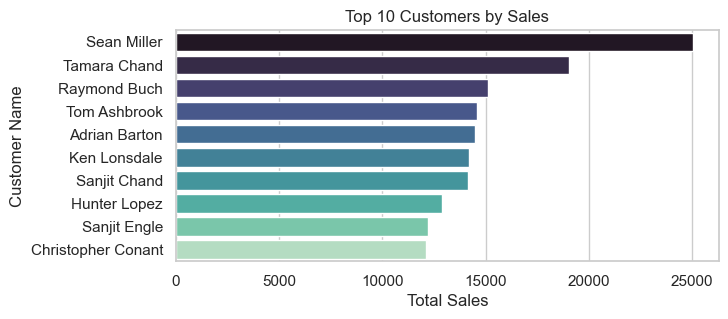

In [41]:
top_customers = df.groupby("Customer Name")['Sales'].sum().nlargest(10)

plt.figure(figsize=(7,3))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="mako")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.show()


#### (g) Category-wise Performance

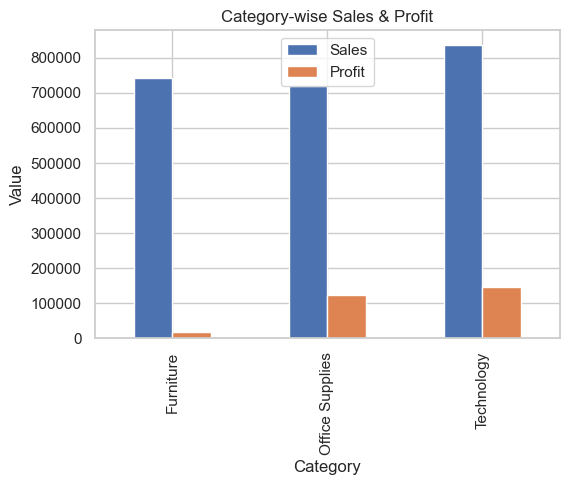

In [43]:
category_perf = df.groupby("Category")[['Sales','Profit']].sum()

category_perf.plot(kind="bar", figsize=(6,4))
plt.title("Category-wise Sales & Profit")
plt.ylabel("Value")
plt.show()


#### 6. Additional Insights

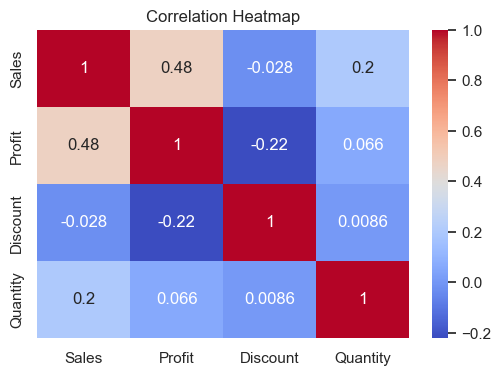

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
